Problem Statement -

Given a Bank customer, can we build a classifier which can determine whether they will leave or
not using Neural networks?


Source
The case study is from an open source dataset from Kaggle. 

Link to the Kaggle project site:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling


Please do the analysis based on steps as given below -
Steps -

The points distribution for this case is as follows:
1. Read the dataset in a new python notebook.
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into Train and test sets
5. Normalize the train and test data (2.5 points)
6. Initialize &amp; build the model (10 points)
7. Optimize the model (5 points)
9. Predict the results using 0.5 as a threshold (5 points)
10. Print the Accuracy score and confusion matrix (2.5 points)


In [0]:
# to ignore warning we can import warnings library 
import warnings
warnings.filterwarnings('ignore')

In [0]:
import theano
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os


In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

# load dataset
df = pd.read_csv('/content/drive/My Drive/NN/bank.csv', delimiter=",")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


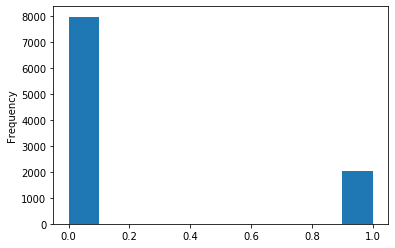

In [0]:
df['Exited'].astype(int).plot.hist()



Delete some features:

We can drop feature 'Surname', 'RowNumber', 'CustomerId'

Obviously, these feature can not take any influence on the final result


In [0]:
df_new = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)
df_new

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [0]:
df_new.isnull().sum().sort_values(ascending=False).head()

Exited             0
EstimatedSalary    0
IsActiveMember     0
HasCrCard          0
NumOfProducts      0
dtype: int64

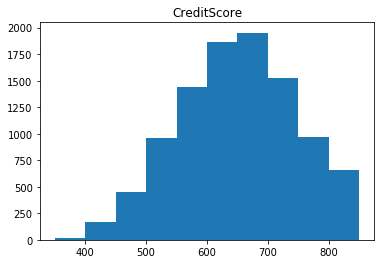

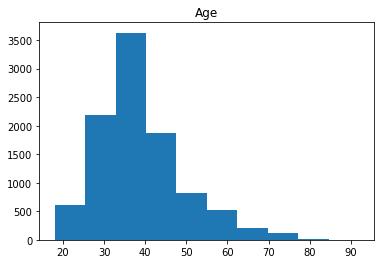

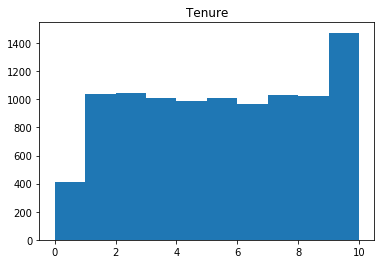

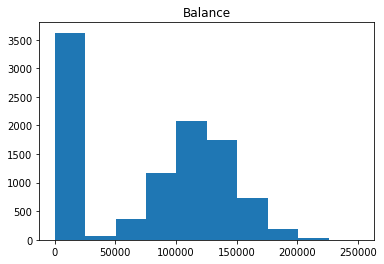

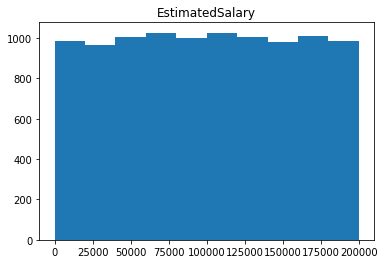

In [0]:
numerical_distribution = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for i in numerical_distribution:
    plt.hist(df_new[i])
    plt.title(i)
    plt.show()

In [0]:


df_new.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
#splitting data into features and target variable
X = df_new.iloc[:,:-1].values
y = df_new.iloc[:,-1].values

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelEncoder_X_1 = LabelEncoder()
X[:, 1]= labelEncoder_X_1.fit_transform(X[:, 1])

labelEncoder_X_2 = LabelEncoder()
X[:, 2] = labelEncoder_X_2.fit_transform(X[:, 2])

In [0]:
oneHotEncoder = OneHotEncoder(categorical_features = [1])
X = oneHotEncoder.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [0]:
X = X[:, 1:]

In [0]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [0]:
#Using sequential model using Keras
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
#building ANN classifier

classifier = Sequential()

#adding first layer(input layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', input_dim=11, 
                     activation='relu'))

#adding second layer(hidden layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

#adding third layer(output layer)
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the ANN
classifier.fit(X_train, y_train, batch_size=10, epochs=100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





8000/8000 [==============================] - 2s 240us/step - loss: 0.4820 - acc: 0.7944
Epoch 2/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4298 - acc: 0.7945
Epoch 3/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4236 - acc: 0.8041
Epoch 4/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4180 - acc: 0.8285
Epoch 5/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4133 - acc: 0.8335
Epoch 6/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4092 - acc: 0.8340
Epoch 7/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4070 - acc: 0.8367
Epoch 8/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4048 - acc: 0.8334
Epoch 9/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4033 - acc: 

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
y_pred = (y_pred > 0.5)


In [36]:
loss, accuracy = classifier.evaluate(X_test, y_test)
print("Model Accuracy --> ", accuracy)

2000/2000 [==============================] - 0s 38us/step
Model Accuracy -->  0.86


In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


In [0]:
cm

array([[1534,   73],
       [ 207,  186]])